# R Nearest Neighbors Classification
> documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

C:\Users\jpini\AppData\Local\Temp\ipykernel_20488\643389566.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df = df[df['Species'] != 0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  100 non-null    float64
 1   Sepal width   100 non-null    float64
 2   Petal length  100 non-null    float64
 3   Petal width   100 non-null    float64
 4   Species       100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


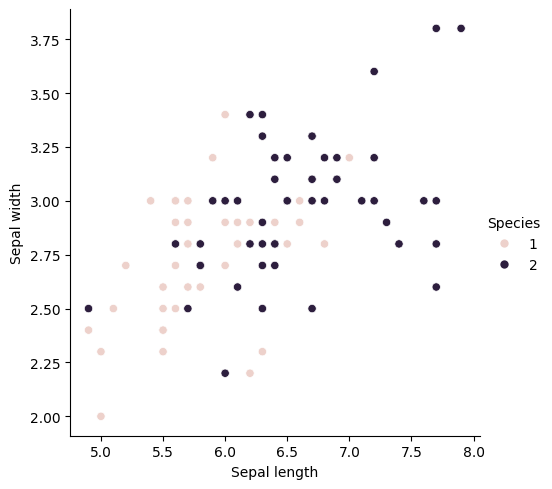

In [6]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

In [7]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:2]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
X_train[:5]

,Sepal length,Sepal width
124,6.7,3.3
62,6.0,2.2
115,6.4,3.2
130,7.4,2.8
122,7.7,2.8


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train[:5]

array([[ 0.64151646,  1.23819254],
       [-0.38490988, -2.02411116],
       [ 0.20161946,  0.94161948],
       [ 1.6679428 , -0.24467278],
       [ 2.10783981, -0.24467278]])

## R-Nearest Neighbors

In [11]:
r = 1

In [12]:
from sklearn.neighbors import RadiusNeighborsClassifier

classifier = RadiusNeighborsClassifier(radius = r)
classifier.fit(X_train, y_train)

RadiusNeighborsClassifier(radius=1)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7 5]
 [2 6]]
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.58      0.67        12
           2       0.55      0.75      0.63         8

    accuracy                           0.65        20
   macro avg       0.66      0.67      0.65        20
weighted avg       0.68      0.65      0.65        20

Accuracy: 0.65


## Best r

In [15]:
def rnn_tuning(r):
  classifier = RadiusNeighborsClassifier(radius = r)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [16]:
rnn_tuning(1)

0.65

In [17]:
rnn_tuning(5)

0.4

In [18]:
rnn_results = pd.DataFrame({'R':np.arange(1, 10, 0.5)})

In [19]:
rnn_results['R']

0     1.0
1     1.5
2     2.0
3     2.5
4     3.0
5     3.5
6     4.0
7     4.5
8     5.0
9     5.5
10    6.0
11    6.5
12    7.0
13    7.5
14    8.0
15    8.5
16    9.0
17    9.5
Name: R, dtype: float64

In [19]:
rnn_results['Accuracy'] = rnn_results['R'].apply(rnn_tuning)
rnn_results['Accuracy']

0     0.65
1     0.70
2     0.65
3     0.65
4     0.55
5     0.45
6     0.45
7     0.40
8     0.40
9     0.40
10    0.40
11    0.40
12    0.40
13    0.40
14    0.40
15    0.40
16    0.40
17    0.40
Name: Accuracy, dtype: float64

In [21]:
rnn_results

,R,Accuracy
0,1.0,0.60
1,1.5,0.55
2,2.0,0.55
3,2.5,0.60
4,3.0,0.55
5,3.5,0.50
6,4.0,0.45
7,4.5,0.45
8,5.0,0.45
9,5.5,0.45


## Optimize weights

In [20]:
def rnn_tuning_uniform(r):
  classifier = RadiusNeighborsClassifier(radius = r, weights= 'uniform')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [21]:
def rnn_tuning_distance(k):
  classifier = RadiusNeighborsClassifier(radius = k, weights= 'distance')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [24]:
rnn_results['Uniform'] = rnn_results['R'].apply(rnn_tuning_uniform)
rnn_results['Distance'] = rnn_results['R'].apply(rnn_tuning_distance)
rnn_results

,R,Accuracy,Uniform,Distance
0,1.0,0.60,0.60,0.50
1,1.5,0.55,0.55,0.45
2,2.0,0.55,0.55,0.45
3,2.5,0.60,0.60,0.45
4,3.0,0.55,0.55,0.45
5,3.5,0.50,0.50,0.45
6,4.0,0.45,0.45,0.45
7,4.5,0.45,0.45,0.45
8,5.0,0.45,0.45,0.45
9,5.5,0.45,0.45,0.45
